In [1]:
import pandas as pd

In [2]:
df=pd.read_excel("Xiaomi.xlsx")

In [3]:
df.head()

,Customer ID,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,1,Monday,Chrome,13,4,8.5,2668.0
1,2,Saturday,Chrome,15,5,16.9,3469.0
2,3,Monday,Internet Explorer,20,6,7.3,5215.0
3,4,Monday,Chrome,42,6,30.1,10423.0
4,5,Saturday,Internet Explorer,20,6,13.3,5404.0


In [4]:
df.describe()

,Customer ID,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
count,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000
mean,21600.500000,23.740000,4.820000,12.810000,6812.820000
std,12470.910151,8.267647,2.016853,6.002444,3201.905731
min,1.000000,8.000000,2.000000,4.300000,1784.000000
25%,10800.750000,18.000000,3.000000,8.500000,4473.000000
50%,21600.500000,22.500000,4.500000,11.400000,6215.000000
75%,32400.250000,29.000000,6.000000,15.100000,8412.000000
max,43200.000000,46.000000,10.000000,32.900000,15851.000000


In [5]:
df=df.drop(columns=['Day','Browser','Customer ID'])

In [6]:
df.head()

,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,13,4,8.5,2668.0
1,15,5,16.9,3469.0
2,20,6,7.3,5215.0
3,42,6,30.1,10423.0
4,20,6,13.3,5404.0


In [7]:
## library name is OrderedDict
from collections import OrderedDict

In [8]:
 for i in df:
        print(i)

No. of Clicks
Pages Viewed
Time (min)
Amount Spent (Rs.)


In [9]:
def custom_summary(df):
    result=[]
    for i in df:
        stats=OrderedDict({'Feature_name':i,
                          'Datatype':df[i].dtype,
                           'Count':df[i].count(),
                           'Min':df[i].min(),
                           'Quartile1':round(df[i].quantile(0.25),3),
                           'Mean':round(df[i].mean(),3),
                           'Median':round(df[i].median(),3),
                           'Quartile3':round(df[i].quantile(0.75),3),
                           'Max':df[i].max(),
                           'Sta dev':round(df[i].std(),2),
                           'Skewness':round(df[i].skew(),2),
                           'kurtosis':round(df[i].kurt(),2),
                           'Range':df[i].max()-df[i].min(),
                           'IQR':round(df[i].quantile(0.75)-df[i].quantile(0.25),3)   
                          }) 
        result.append(stats)
        #skewness comment
        if df[i].skew()<-1:
            sklabel="High -ve skewed"
        elif -1<df[i].skew()<-0.5:
            sklabel="Moderate -ve skew"
        elif -0.5<df[i].skew()<0:
            sklabel="Low -'ve skewed"
        elif 0<df[i].skew()<0.5:
            sklabel="Low +'ve skewed"
        elif 0.5<df[i].skew()<1:
            sklabel="Moderate +ve skew"
        elif df[i].skew()>1:
            sklabel="Highly +ve skewed"
        else:
            sklabel="Error"
        stats["skewness comment"]=sklabel
        #outlier comment
        upper_limit = stats["Quartile3"]+(1.5*stats['IQR'])
        lower_limit = stats["Quartile1"]-(1.5*stats['IQR'])
        if len([x for x in df[i] if x <lower_limit or x>upper_limit])>0:
            outlier_comment="Has outliers"
        else:
            outlier_comment="No outliers"
        stats["outlier comment"]=outlier_comment
        
    result_df=pd.DataFrame(result)
    return result_df
custom_summary(df)

,Feature_name,Datatype,Count,Min,Quartile1,Mean,Median,Quartile3,Max,Sta dev,Skewness,kurtosis,Range,IQR,skewness comment,outlier comment
0,No. of Clicks,int64,43200,8.0,18.0,23.74,22.5,29.0,46.0,8.27,0.68,0.03,38.0,11.0,Moderate +ve skew,Has outliers
1,Pages Viewed,int64,43200,2.0,3.0,4.82,4.5,6.0,10.0,2.02,0.63,0.03,8.0,3.0,Moderate +ve skew,No outliers
2,Time (min),float64,43200,4.3,8.5,12.81,11.4,15.1,32.9,6.00,1.41,2.05,28.6,6.6,Highly +ve skewed,Has outliers
3,Amount Spent (Rs.),float64,43200,1784.0,4473.0,6812.82,6215.0,8412.0,15851.0,3201.91,1.02,0.67,14067.0,3939.0,Highly +ve skewed,Has outliers


In [10]:
custom_summary(df)

,Feature_name,Datatype,Count,Min,Quartile1,Mean,Median,Quartile3,Max,Sta dev,Skewness,kurtosis,Range,IQR,skewness comment,outlier comment
0,No. of Clicks,int64,43200,8.0,18.0,23.74,22.5,29.0,46.0,8.27,0.68,0.03,38.0,11.0,Moderate +ve skew,Has outliers
1,Pages Viewed,int64,43200,2.0,3.0,4.82,4.5,6.0,10.0,2.02,0.63,0.03,8.0,3.0,Moderate +ve skew,No outliers
2,Time (min),float64,43200,4.3,8.5,12.81,11.4,15.1,32.9,6.00,1.41,2.05,28.6,6.6,Highly +ve skewed,Has outliers
3,Amount Spent (Rs.),float64,43200,1784.0,4473.0,6812.82,6215.0,8412.0,15851.0,3201.91,1.02,0.67,14067.0,3939.0,Highly +ve skewed,Has outliers


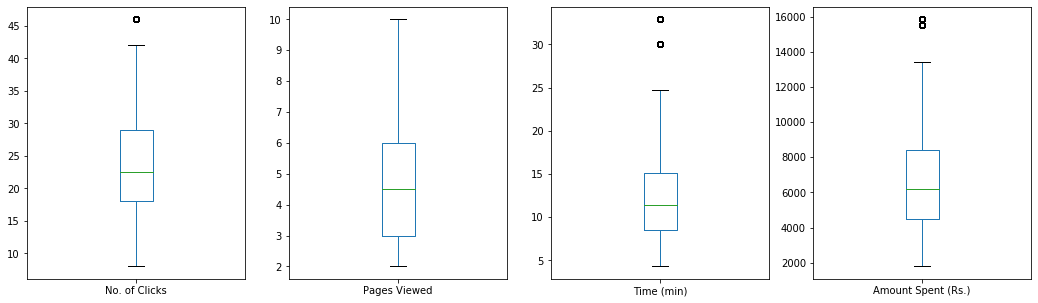

In [11]:
area=df.plot.box(figsize=(18, 5), subplots=True)